<a href="https://colab.research.google.com/github/ankursalunke/NLP_Sentiment_Analysis/blob/master/Colab_growth_hacking_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up the environment
## Install requirements

In [0]:
#!wget https://raw.githubusercontent.com/crow-intelligence/growth-hacking-sentiment/master/requirements.txt
#!pip install -r requirements.txt
#%%writefile setup.sh

#export CUDA_HOME=/usr/local/cuda-10.1
#git clone https://github.com/NVIDIA/apex
#pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./apex
#!sh setup.sh

## Connect your Colab notebook to your Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Installing ndjson since our data file is a new line delimited JSON.
Installing imblearn to perform random under sampling

In [3]:
!pip install ndjson
!pip install imblearn

Importing the required packages

In [4]:
import ndjson
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn import under_sampling

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Importing data from our data file to a dictionary

In [0]:
with open('/content/drive/My Drive/Colab Notebooks/Growth_Hacking_Data/Video_Games_5.json') as f:
  data = ndjson.load(f)

Converting the data in dict form to a dataframe.

In [0]:
dataset = pd.DataFrame.from_dict(data)

Checking the size of the dataset.

In [7]:
print("The dataset has ",dataset.shape[0],"rows and ",dataset.shape[1],"columns.")

The dataset has  497577 rows and  12 columns.


Viewing a sample of the data.

In [8]:
dataset.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


Checking the number of missing values in the dataset.

In [9]:
dataset.isnull().sum()

overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName          76
reviewText           158
summary              109
unixReviewTime         0
vote              389784
style             208340
image             493943
dtype: int64

Since we would be using the reviewText column, we need to take care of the missing values. We have just put an empty string there for now.

In [0]:
dataset['reviewText'].fillna("",inplace=True)



Plotting the distribution of ratings .



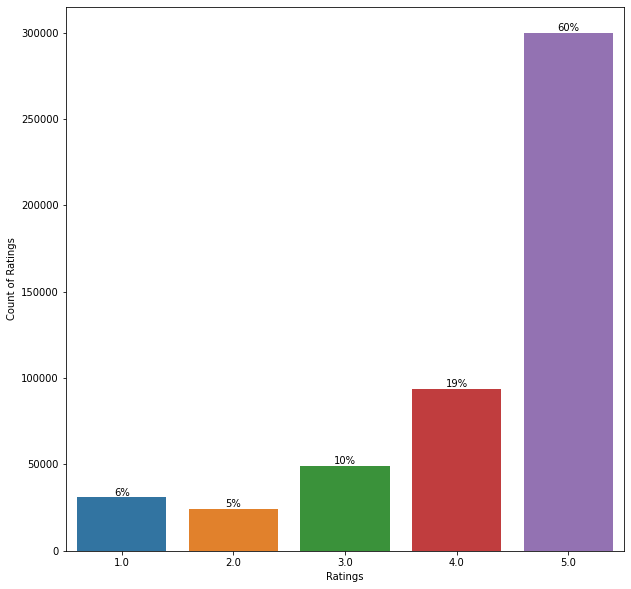

In [11]:
f,ax = plt.subplots(figsize=(10,10))
sns.countplot(dataset['overall'])
ax.set_ylabel("Count of Ratings")
ax.set_xlabel("Ratings")
bars = ax.patches
total_height = sum([bar.get_height() for bar in bars])

for bar in bars:
  ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+1000,'{0:.0%}'.format(bar.get_height()/total_height),ha="center")

Initializing random under sampler as per the strategy suggested.

In [0]:
random_us = under_sampling.RandomUnderSampler(sampling_strategy = {1.0:1500,2.0:500,3.0:500,4.0:500,5.0:1500},random_state=42)

Preparing the data to be passed for under sampling.

In [0]:
X= dataset.reviewText.values.reshape(-1,1)
y= dataset.overall.values.reshape(-1,1)

Resamping the data as per the strategy.

In [14]:
X_usample, y_usample = random_us.fit_resample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


We run a counter to check if the new sample has the data as per our requirement.

In [15]:
flat_list = [item for sublist in y_usample for item in sublist]
from collections import Counter
Counter(flat_list)

Counter({1.0: 1500, 2.0: 500, 3.0: 500, 4.0: 500, 5.0: 1500})

We use np.random.choice to selected a random sample of 100,000 records and put it in a new dataset.

In [0]:
np.random.seed(42)
index_random = np.random.choice(np.arange(dataset.index.values.max()+1),100000,replace=False)
dataset_100k = dataset.loc[index_random,["overall","reviewText"]].reset_index(drop=True)

Checking the size of the new dataset.

In [17]:
dataset_100k.shape

(100000, 2)

Renaming the columns in the new dataset as per our requirement.

In [0]:
dataset_100k.rename(columns={"overall":"ratings","reviewText":"reviews"},inplace=True)

Checking a sample of 10 rows of data in our new dataset.

In [19]:
dataset_100k.sample(10)

,ratings,reviews
55272,5.0,"Just as Stated, Grandson loved it!!!!! Thank you."
4913,5.0,--- 2017 Update. I couldn't be happier with ...
44561,5.0,I just recently starting playing The Sims (the...
35634,2.0,Crappy
9060,4.0,"As one might expect, there are similarities be..."
28112,5.0,Great Amiibo to add to any collection
17542,5.0,GPU killer game\nreally fantastic game I love ...
11713,2.0,"To be fair, I realize I have higher demands on..."
3176,3.0,This is a boring game. I was very excited to p...
83174,2.0,"Compared to GTA or Sleeping Dogs, the only thi..."


Exporting the data into two files.

In [0]:
dataset_100k.to_csv("/content/drive/My Drive/Colab Notebooks/Growth_Hacking_Data/small_corpus.csv")
dataset_100k.to_csv("/content/drive/My Drive/Colab Notebooks/Growth_Hacking_Data/big_corpus.csv")